<a href="https://colab.research.google.com/github/miketriana/cap4630-wocjan/blob/master/HW_2/HW2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2
Extend the code for mini-batch gradient descent in the notebook [linear_regression_gradient_descent.ipynb](https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-) to the case n=2, that is, the model parameters are the two weights w1 and w2 and the bias term b. (You can remove the code for batch-gradient descent and stochastic gradient descent.) Make sure that your code is vectorized.

First import the necessary modules:

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Then we will generate some data:

In [0]:
# Generate m random points (x, y, z)

m = 100
x1 = 2 * np.random.rand(m, 1)
x2 = 2 * np.random.rand(m, 1)
y = 4 + 3 * x1 + 2 * x2 + np.random.rand(m, 1)

X1, X2 = np.meshgrid(x1, x2)
Y = 4 + 3 * X1 + 2 * X2 + np.random.rand(m, 1)

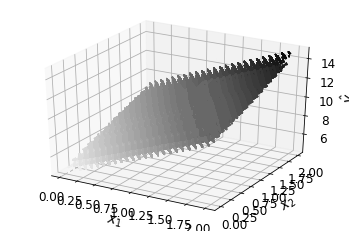

In [0]:
ax = plt.axes(projection="3d")
ax.contour3D(X1, X2, Y, 50, cmap='binary')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$\hat y$');

For $n=2$, linear regression is calculated using the formula  $\hat y=b+w_1x_1 + w_2x_2$ . It will be convenient to rewrite this as a dot product. Define  $w=(w_0,w_1,w_2)$  and  $x=(1,x_1,x_2)$ . Then, we have  $\hat y=w⋅x$ .

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), x1, x2])

In [0]:
print(X_b.shape)

(100, 3)


In [0]:
print(X_b[:5, :])

[[1.         1.06448998 1.95345048]
 [1.         0.25148302 1.64634803]
 [1.         0.26542931 1.04496208]
 [1.         0.28708472 0.24644531]
 [1.         1.87963958 1.71883159]]


Then we define the number of epochs, learning rate, and initial weight values:

In [0]:
epochs = 20

lr = 0.01

np.random.seed(42)
initial_weight = np.random.randn(3, 1) 

In [0]:
print(initial_weight.shape)
print(y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

(3, 1)
(100, 1)
(100, 1)
(3, 1)


Then perform linear regression using mini-batch gradient descent:

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [0]:
weight_path_mgd[-1]

array([[3.60271914],
       [3.17130016],
       [2.60812878]])

In [0]:
weight_path_mgd = np.array(weight_path_mgd)

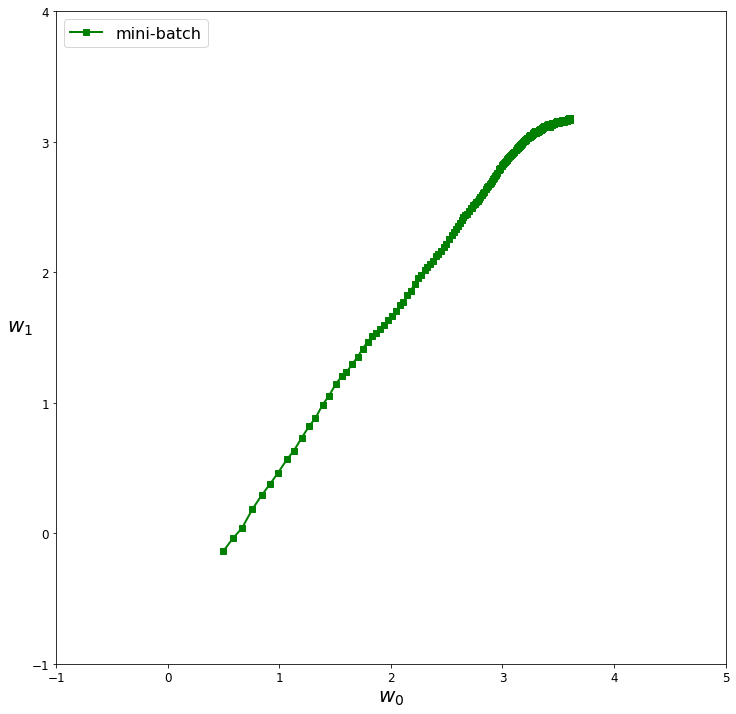

In [0]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 5, -1, 4])
plt.show()

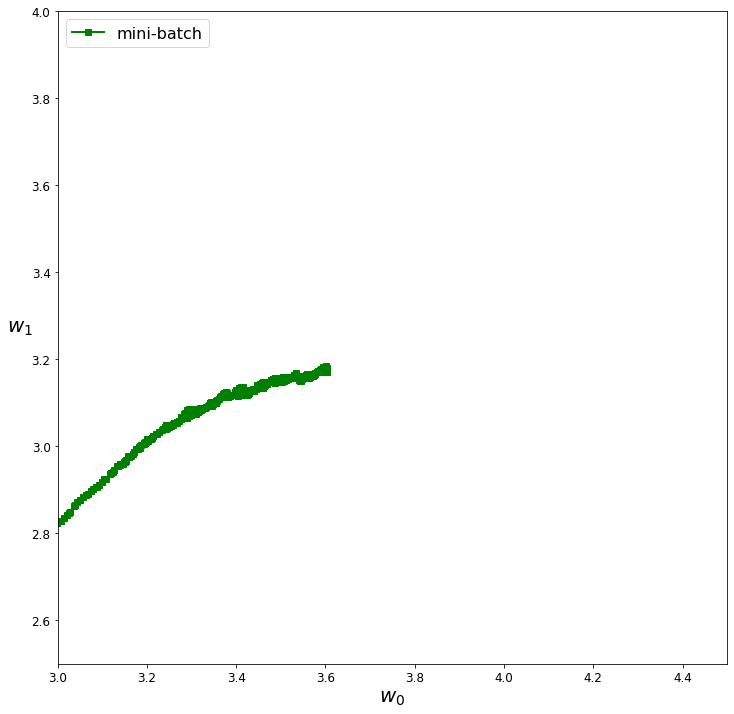

In [0]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([3, 4.5, 2.5, 4])
plt.show()